In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [4]:
stocks = 'AAPL GLD'. split()
data = pdr.get_data_yahoo(stocks, '2018-01-12')['Close']

vol = pd.DataFrame()
for stock in stocks:
    if stock not in vol:
        vol[stock] = np.log(data[stock]).diff() 

In [5]:
# ADJUST TO YEARS WORTH OF DATA
vol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-01-12 to 2019-01-15
Data columns (total 2 columns):
AAPL    252 non-null float64
GLD     252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


In [6]:
var_aapl = vol['AAPL'].var() * 252
var_gld = vol['GLD'].var() *252
print(var_aapl)
print(var_gld)

0.09608577716448766
0.009344685520152596


In [8]:
w_aapl =  .9
w_gld = 1 - w_aapl
exp_aapl = .14
exp_gld = .07

In [9]:
exp = w_aapl * exp_aapl + w_gld * exp_gld
exp

0.13300000000000003

In [14]:
cov = np.cov(vol['AAPL'][1:], vol['GLD'][1:])[0,1] *252
cov

-0.002451352516230424

In [15]:
port_std = np.sqrt(var_aapl * w_aapl **2 + var_gld * w_gld ** 2 + 2 * cov * w_aapl * w_gld)
port_std

0.2783553177245139

In [18]:
effic = pd.DataFrame({'weight_aapl':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})
w_aapl = 0.0
for weight in range(21):
    effic['weight_aapl'][weight] = w_aapl
    effic['exp_ret'][weight] = w_aapl * exp_aapl + (1-w_aapl) * exp_gld
    effic['std'][weight] = np.sqrt(var_aapl * w_aapl ** 2 + var_gld * (1-w_aapl) ** 2 + cov * w_aapl * (1 - w_aapl))
    w_aapl = w_aapl + .05

effic

,weight_aapl,exp_ret,std
0,0.00,0.0700,0.096668
1,0.05,0.0735,0.092506
2,0.10,0.0770,0.091156
3,0.15,0.0805,0.092741
4,0.20,0.0840,0.097118
5,0.25,0.0875,0.103933
6,0.30,0.0910,0.112747
7,0.35,0.0945,0.123130
8,0.40,0.0980,0.134720
9,0.45,0.1015,0.147233


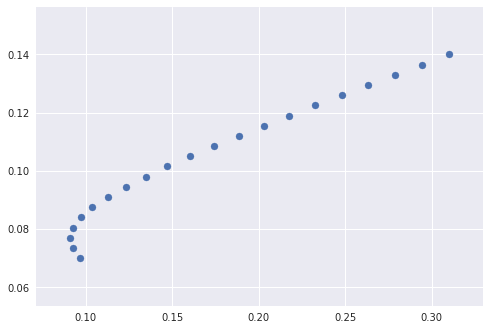

In [19]:
with plt.style.context('seaborn'):
    plt.scatter(effic['std'],effic['exp_ret'])

In [ ]:
# to add a third security and get additional benefit from diversification you would need to adjust the weights
# accordingly and add in terms for covariation of security 1 & 3 and security 2 & 3
# so for an equal weight portfolio it would look something like this:
# np.sqrt(.333 ** 2 * sec1_var + .333 ** 2 * sec2_var + .333 ** 2 * sec3_var + 
#         2 * cov_sec1_sec2 + 2 * cov_sec_1_sec2 + 2 * cov_sec2_sec3)